In [31]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [34]:
def histogram(img):
  hist = [0] * 256
  for i in range(0, len(img)):
    for j in range(0, len(img[0])):
      hist[img[i][j]] += 1
  return hist

In [35]:
def countPixels(hist):
  count = 0
  for i in range(0, len(hist)):
    if hist[i] >= 0:
      count += hist[i]
  return count

In [36]:
def threshold_with_two_regions(new_gray_image):
  hist = histogram(new_gray_image)
  plt.bar(np.arange(0, 256), hist)
  plt.show()
  count_pixels = countPixels(hist)
  min_var = float('inf')
  threshold = 0
  var_b = 0
  var_f = 0
  w_b = 0
  w_f = 0
  sum_b = 0
  for t in range(0, len(hist)):
    # Calculate weights
    w_b += hist[t]
    if w_b == 0:
      continue
    w_f = countPixels(hist) - w_b
    if w_f == 0:
      break

    sum_b += t * hist[t]
    sum_f = (np.sum(np.arange(0, 256) * hist)) - sum_b
     # Calculate means
    mu_b = sum_b / w_b
    mu_f = sum_f / w_f
    
    # Calculate variances
    var_b = np.sum((np.arange(0, t + 1) - mu_b) ** 2 * hist[:t + 1]) / w_b
    
    var_f = np.sum((np.arange(t + 1, 256) - mu_f) ** 2 * hist[t + 1:]) / w_f
    
    # Calculate weighted sum of variances
    total_var = ((w_b/count_pixels) * (var_b)) + ((w_f/count_pixels) * (var_f))
    
    # Update thresholds if variance is minimized
    if total_var < min_var:
      min_var = total_var
      threshold = t
  
  print("Total Variance: ",min_var)
  return threshold




In [37]:
def threshold_with_three_regions(image):
    hist = histogram(image)
    # Precompute cumulative sums for efficiency
    cum_sum = np.cumsum(hist)
    cum_mean = np.cumsum(hist * np.arange(256))


    min_var = float('inf')
    optimal_thresholds = (0, 0)

    # Iterate over all possible doubles of thresholds
    for t1 in range(1, 254):
        for t2 in range(t1 + 1, 255):
            # Calculate weights
            w1 = cum_sum[t1]
            w2 = cum_sum[t2] - cum_sum[t1]
            w3 = 1 - cum_sum[t2]

            # Skip if any weight is zero
            if w1 == 0 or w2 == 0 or w3 == 0:
                continue

            # Calculate means
            mu1 = cum_mean[t1] / w1
            mu2 = (cum_mean[t2] - cum_mean[t1]) / w2
            mu3 = (cum_mean[255] - cum_mean[t2]) / w3

            # Calculate variances
            var1 = np.sum((np.arange(0, t1 + 1) - mu1) ** 2 * hist[:t1 + 1]) / w1
            var2 = np.sum((np.arange(t1 + 1, t2 + 1) - mu2) ** 2 * hist[t1 + 1:t2 + 1]) / w2
            var3 = np.sum((np.arange(t2 + 1, 256) - mu3) ** 2 * hist[t2 + 1:]) / w3
         

            # Calculate weighted sum of variances
            total_var = w1 * var1 + w2 * var2 + w3 * var3
        
            # Update thresholds if variance is minimized
            if total_var < min_var:
                min_var = total_var
                optimal_thresholds = (t1, t2)

    
    print("Total Variance: ",min_var)
    return optimal_thresholds

In [38]:

def threshold_with_four_regions(image):
    hist = histogram(image)

    # Precompute cumulative sums for efficiency
    cum_sum = np.cumsum(hist)
    cum_mean = np.cumsum(hist * np.arange(256))

    min_var = float('inf')
    optimal_thresholds = (0, 0, 0)

    # Iterate over all possible triplets of thresholds
    for t1 in range(1, 253):
        for t2 in range(t1 + 1, 254):
            for t3 in range(t2 + 1, 255):
                # Calculate weights
                w1 = cum_sum[t1]
                w2 = cum_sum[t2] - cum_sum[t1]
                w3 = cum_sum[t3] - cum_sum[t2]
                w4 = 1 - cum_sum[t3]

                # Skip if any weight is zero
                if w1 == 0 or w2 == 0 or w3 == 0 or w4 == 0:
                    continue

                # Calculate means
                mu1 = cum_mean[t1] / w1
                mu2 = (cum_mean[t2] - cum_mean[t1]) / w2
                mu3 = (cum_mean[t3] - cum_mean[t2]) / w3
                mu4 = (cum_mean[255] - cum_mean[t3]) / w4

                # Calculate variances
                var1 = np.sum((np.arange(0, t1 + 1) - mu1) ** 2 * hist[:t1 + 1]) / w1
                var2 = np.sum((np.arange(t1 + 1, t2 + 1) - mu2) ** 2 * hist[t1 + 1:t2 + 1]) / w2
                var3 = np.sum((np.arange(t2 + 1, t3 + 1) - mu3) ** 2 * hist[t2 + 1:t3 + 1]) / w3
                var4 = np.sum((np.arange(t3 + 1, 256) - mu4) ** 2 * hist[t3 + 1:]) / w4
                

                # Calculate weighted sum of variances
                total_var = w1 * var1 + w2 * var2 + w3 * var3 + w4 * var4
                

                # Update thresholds if variance is minimized
                if total_var < min_var:
                    min_var = total_var
                    optimal_thresholds = (t1, t2, t3)

    
    print("Total Variance: ",min_var)
    return optimal_thresholds

In [39]:
import os
import shutil
def move_to_folder(file_path):
    downloads_path = os.path.join(os.path.expanduser("~"), "/Users/komalbagwe/Documents/OtsuThreshold")
    shutil.move(file_path, os.path.join(downloads_path, os.path.basename(file_path)))
    print(f"Moved {file_path} to OtsuThreshold folder.")

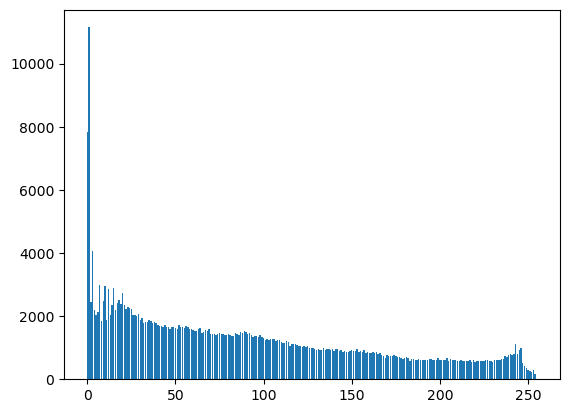

Total Variance:  1321.495701465642
Total Variance:  420354567.679206
Total Variance:  180965973.79668894
Moved otsu_2_region_out_tiger1.bmp to OtsuThreshold folder.
Moved otsu_3_region_out_tiger1.bmp to OtsuThreshold folder.
Moved otsu_4_region_out_tiger1.bmp to OtsuThreshold folder.
Results for tiger1.bmp:
Optimal Threshold (2 regions): 107
Optimal Thresholds (3 regions): (107, 254)
Optimal Thresholds (4 regions): (64, 151, 254)




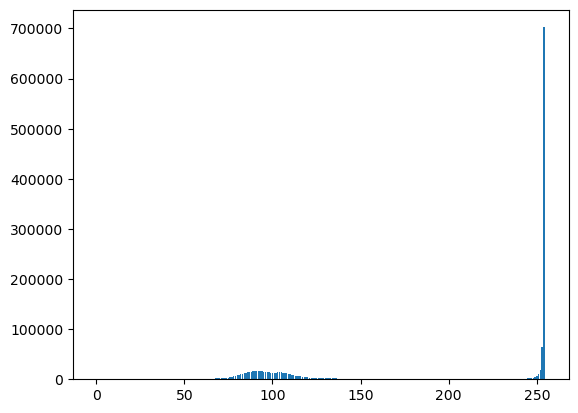

Total Variance:  184.7546019457958
Total Variance:  266046626.80194592
Total Variance:  139525869.06259522
Moved otsu_2_region_out_basket_balls.bmp to OtsuThreshold folder.
Moved otsu_3_region_out_basket_balls.bmp to OtsuThreshold folder.
Moved otsu_4_region_out_basket_balls.bmp to OtsuThreshold folder.
Results for basket_balls.bmp:
Optimal Threshold (2 regions): 175
Optimal Thresholds (3 regions): (175, 254)
Optimal Thresholds (4 regions): (100, 184, 254)




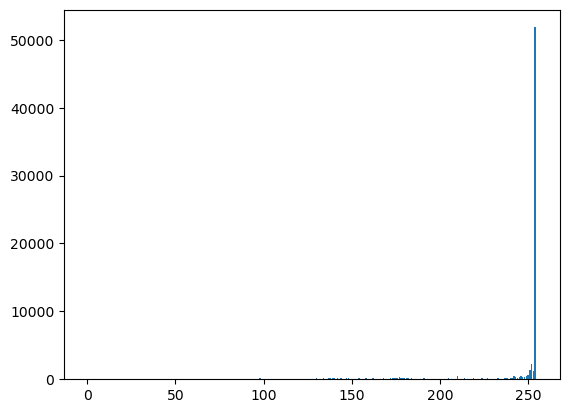

Total Variance:  516.9529330494724
Total Variance:  39701985.25819949
Total Variance:  14069764.870658644
Moved otsu_2_region_out_data13.bmp to OtsuThreshold folder.
Moved otsu_3_region_out_data13.bmp to OtsuThreshold folder.
Moved otsu_4_region_out_data13.bmp to OtsuThreshold folder.
Results for data13.bmp:
Optimal Threshold (2 regions): 186
Optimal Thresholds (3 regions): (186, 254)
Optimal Thresholds (4 regions): (109, 206, 254)




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load the image
paths = ["tiger1.bmp", "basket_balls.bmp", "data13.bmp"]
for idx, path in enumerate(paths):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Unable to load image at {path}")
        continue
    

    # Convert to grayscale
    gray_img = np.dot(img, [0.299, 0.587, 0.114])
    gray_img = np.uint8(gray_img)
   

    # Apply Otsu thresholding for 2 regions
    optimal_threshold_two_region = threshold_with_two_regions(gray_img)
    _, binary_image_2_region = cv2.threshold(gray_img, optimal_threshold_two_region, 255, cv2.THRESH_BINARY)

    # Apply Otsu thresholding for 3 regions
    optimal_threshold_three_region = threshold_with_three_regions(gray_img)
    binary_image_3_region = np.zeros_like(gray_img)
    t1, t2 = optimal_threshold_three_region
    binary_image_3_region[gray_img <= t1] = 0  # Class 1
    binary_image_3_region[(gray_img > t1) & (gray_img <= t2)] = 128  # Class 2
    binary_image_3_region[gray_img > t2] = 255  # Class 3

    # Apply Otsu thresholding for 4 regions
    optimal_threshold_four_region = threshold_with_four_regions(gray_img)
    binary_image_4_region = np.zeros_like(gray_img)
    t1, t2, t3 = optimal_threshold_four_region
    binary_image_4_region[gray_img <= t1] = 0  # Class 1
    binary_image_4_region[(gray_img > t1) & (gray_img <= t2)] = 85  # Class 2
    binary_image_4_region[(gray_img > t2) & (gray_img <= t3)] = 170  # Class 3
    binary_image_4_region[gray_img > t3] = 255  # Class 4

    # Save and download the results
    output_filename_2_region = f"otsu_2_region_out_{paths[idx]}"
    output_filename_3_region = f"otsu_3_region_out_{paths[idx]}"
    output_filename_4_region = f"otsu_4_region_out_{paths[idx]}"

    cv2.imwrite(output_filename_2_region, binary_image_2_region)
    cv2.imwrite(output_filename_3_region, binary_image_3_region)
    cv2.imwrite(output_filename_4_region, binary_image_4_region)
    
    move_to_folder(output_filename_2_region)
    move_to_folder(output_filename_3_region)
    move_to_folder(output_filename_4_region)

    print(f"Results for {path}:")
    print("Optimal Threshold (2 regions):", optimal_threshold_two_region)
    print("Optimal Thresholds (3 regions):", optimal_threshold_three_region)
    print("Optimal Thresholds (4 regions):", optimal_threshold_four_region)
    print("\n")